# Calculation of SVD

In [1]:
from numpy import array
from scipy.linalg import svd
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
U, s, VT = svd(A)
print(U)
print(s)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


# Pseudoinverse matrix

In [2]:
from numpy import array
from numpy.linalg import pinv
A = array([
	[0.1, 0.2],
	[0.3, 0.4],
	[0.5, 0.6],
	[0.7, 0.8]])
print(A)
B = pinv(A)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  4.84560121e-15  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


In [3]:

# Pseudoinverse via SVD
from numpy import array
from numpy.linalg import svd
from numpy import zeros
from numpy import diag
# define matrix
A = array([
 [0.1, 0.2],
 [0.3, 0.4],
 [0.5, 0.6],
 [0.7, 0.8]])
print(A)
# calculate svd
U, s, VT = svd(A)
# reciprocals of s
d = 1.0 / s
# create m x n D matrix
D = zeros(A.shape)
# populate D with n x n diagonal matrix
D[:A.shape[1], :A.shape[1]] = diag(d)
# calculate pseudoinverse
B = VT.T.dot(D.T).dot(U.T)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  4.85722573e-15  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


# Reduction of dimension

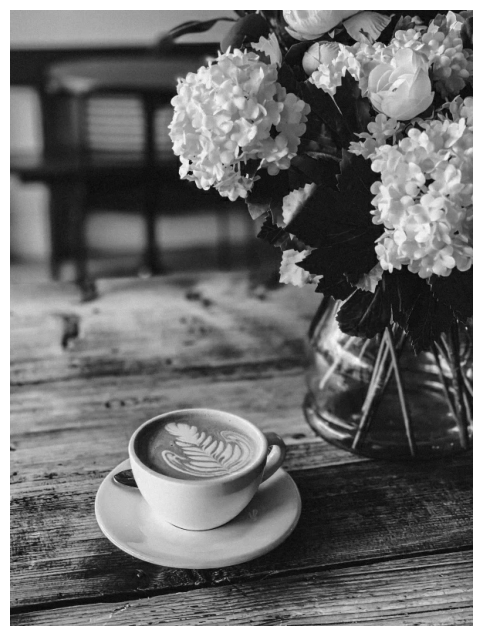

(600,)


In [4]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]

A = imread('7.webp')
X = np.mean(A,-1)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

U, S, VT = np.linalg.svd(X,full_matrices=False)
print(S.shape)
S = np.diag(S)

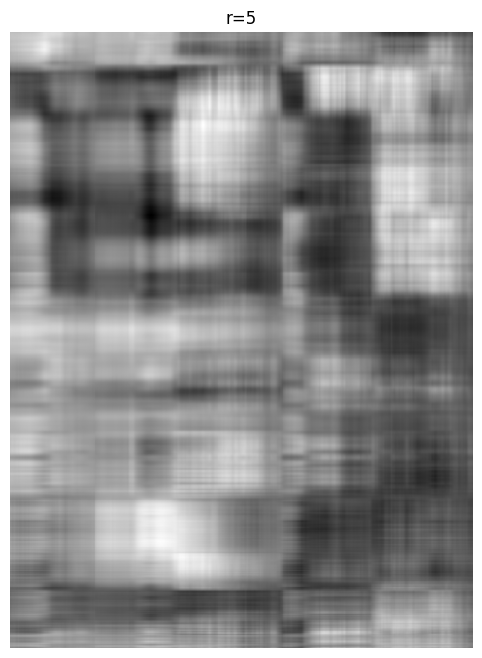

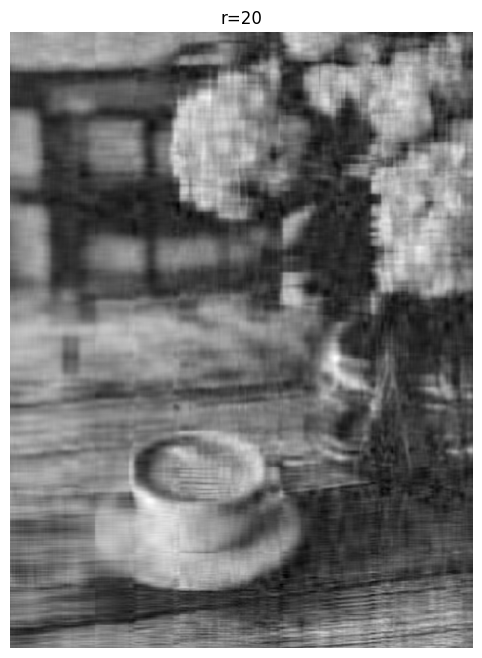

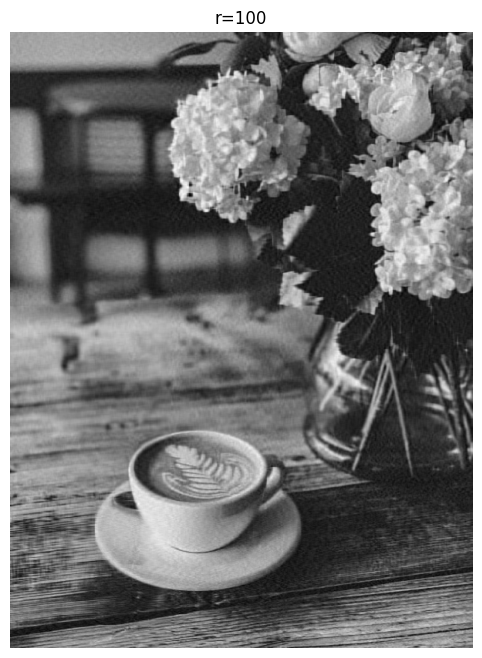

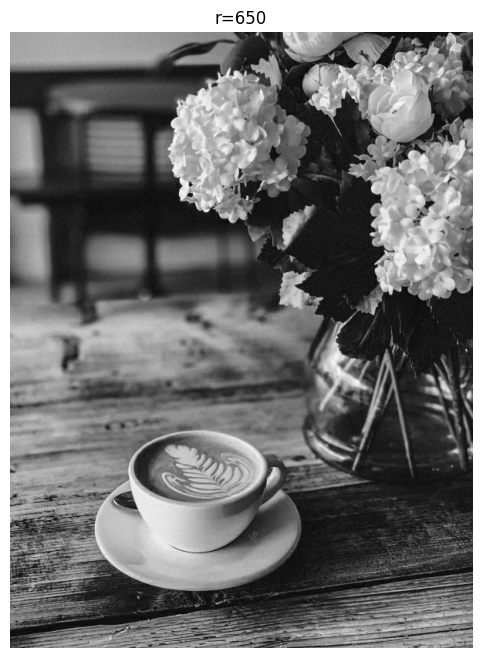

In [5]:
j=0
for r in (5,20,100,650):
    Xapprox = U[:,:r]@S[0:r,:r]@VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r='+str(r))
    plt.show()

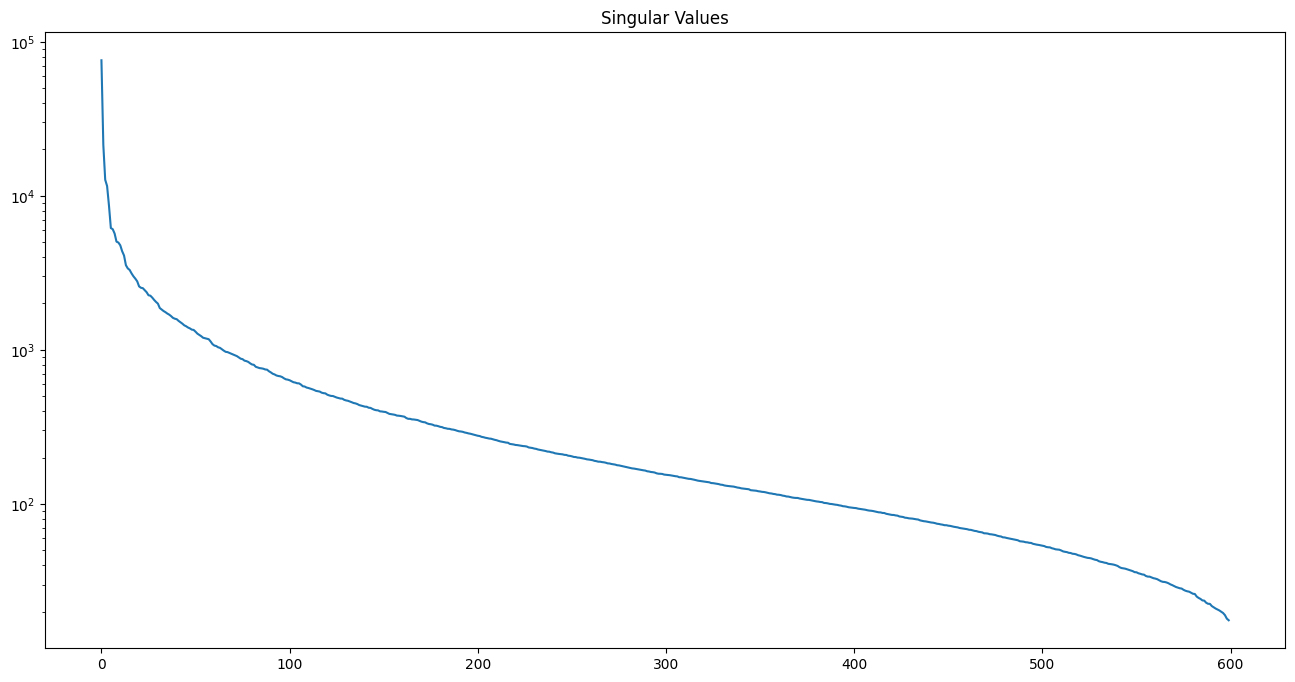

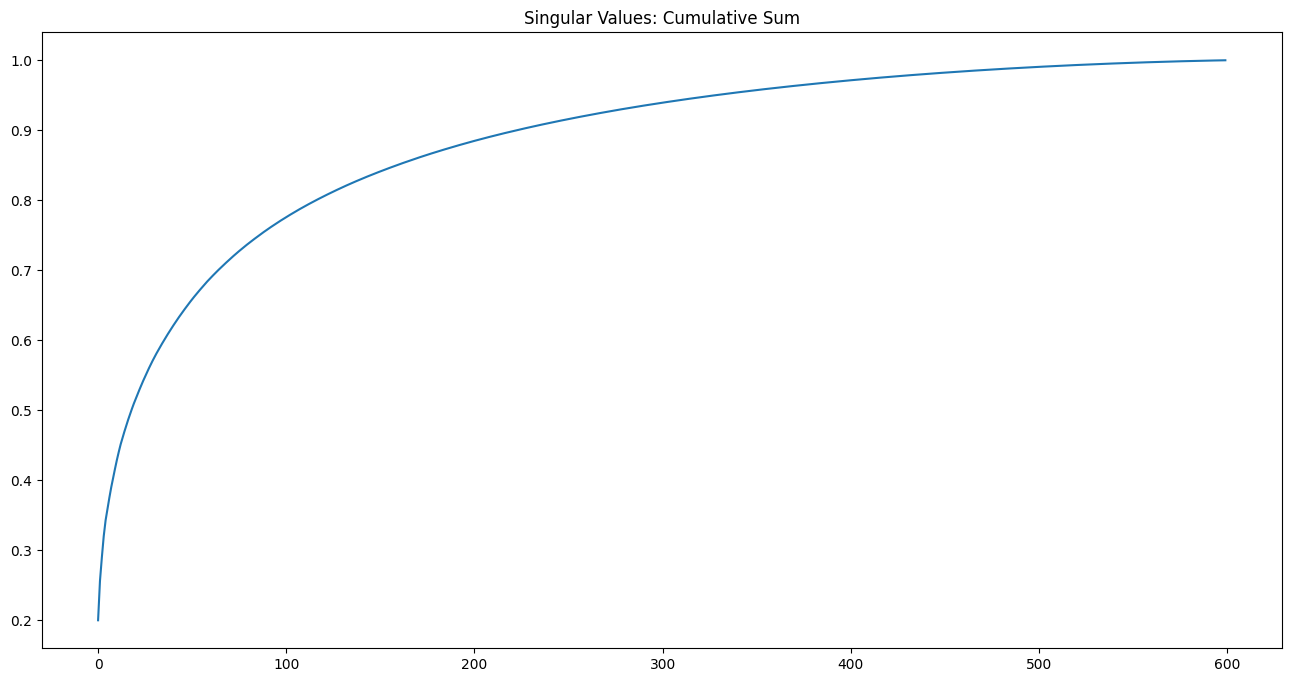

Aby zachować 90% informacji, należy użyć 224 wartości singularnych.


In [6]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

info_ratio = np.cumsum(np.diag(S)) / np.sum(np.diag(S))
r_90 = np.argmax(info_ratio >= 0.90) + 1 

print(f"Aby zachować 90% informacji, należy użyć {r_90} wartości singularnych.")